<a href="https://colab.research.google.com/github/seohyun126/2025-Cheonan-DataIdea-Competition/blob/main/LISA_%EC%B2%9C%EC%95%88%EC%8B%9C_%EC%B9%A8%EC%88%98_%ED%94%BC%ED%95%B4%2C_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A1%9C_%EC%84%A4%EA%B3%84%ED%95%9C_%EC%A7%80%EC%97%AD%EB%B3%84_%EB%8C%80%EC%9D%91_%EB%B0%A9%EC%95%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q geopandas mgwr pysal spglm

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.0/142.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.1/248.1 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.9/389.9 kB 14.5 MB/s eta 0:00:00
   ━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# *1) LISA 분석*

## **LISA 분석을 위한 데이터 불러오기**

In [ ]:
gdf=gpd.read_file('/content/drive/MyDrive/천안시_공모전/최종데이터_비율/최종데이터_비율.shp')

LISA 분석을 위한 RAIN_INDICATOR 열 추가하기

In [ ]:
import numpy as np

# 연도별로 43개씩 구분
years = [2014]*43 + [2017]*43 + [2020]*43
gdf['Year'] = years

# 연도별 기준 강수량 이상 지역 set 구성
rain_2014 = {'44133103', '44133108', '44133104', '44133253', '44133102', '44133256'}
rain_2017 = {'44131107', '44131108', '44131113', '44131114', '44131340', '44131350', '44131360', '44133102',
             '44131101','44131102','44131103','44131115','44131250','44131370','44133101','44133104',
             '44133107','44133253','44133256','44133310'}
rain_2020 = {'44131114','44133101','44131107','44131108','44131113','44133102','44131116','44131250',
             '44131330','44131360','44131350','44133107','44133110','44133250','44133256',
             '44131101','44131102','44131103','44131115','44131310','44131320','44131340',
             '44131370','44133103','44133104','44133253','44133310'}

# 연도 + 법정동 코드 조합으로 set 생성
rain_flag_set = set()
rain_flag_set |= {(2014, code) for code in rain_2014}
rain_flag_set |= {(2017, code) for code in rain_2017}
rain_flag_set |= {(2020, code) for code in rain_2020}

# indicator column 생성
gdf['Rain_Indicator'] = gdf.apply(
    lambda row: 1 if (row['Year'], str(row['EMD_CD'])) in rain_flag_set else 0,
    axis=1
)

 ## **LISA 분석 실행**

In [ ]:
from esda.moran import Moran_Local
from esda.moran import Moran
import libpysal

w = libpysal.weights.Queen.from_dataframe(gdf)

lisa = Moran_Local(gdf['Flood'], w)
gdf['lisa_cluster'] = lisa.q   # 1=HH, 2=LH, 3=LL, 4=HL
gdf['lisa_p'] = lisa.p_sim

/tmp/ipython-input-2363259946.py:5: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = libpysal.weights.Queen.from_dataframe(gdf)
/usr/local/lib/python3.12/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


In [ ]:
gdf.groupby('lisa_cluster')['Flood'].mean()

 ## **LISA 분석 시각화**

/tmp/ipython-input-2151814168.py:18: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  gdf[gdf['lisa_cluster'].isin([1,2,3,4])].plot(


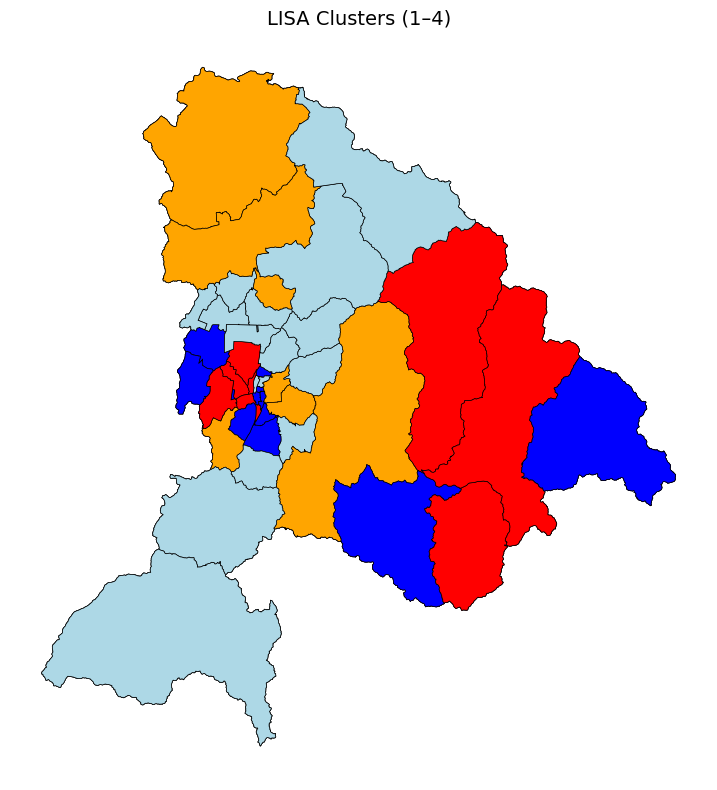

In [ ]:
import matplotlib.pyplot as plt

# 1~4번 클러스터 색상 지정
# 클러스터별 색상 매핑
cluster_colors = {
    1: 'red',       # HH
    2: 'blue',      # LL
    3: 'lightblue', # LH
    4: 'orange'     # HL
}

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# 전체 배경 (옅은 회색)
gdf.plot(ax=ax, color='lightgrey', edgecolor='white', linewidth=0.5)

# 클러스터 1~4만 색상 적용
gdf[gdf['lisa_cluster'].isin([1,2,3,4])].plot(
    ax=ax,
    column='lisa_cluster',
    categorical=True,
    legend=True,
    legend_kwds={'title': 'LISA Cluster'},
    color=gdf['lisa_cluster'].map(cluster_colors),
    edgecolor='black',
    linewidth=0.5
)

ax.set_title('LISA Clusters (1–4)', fontsize=14)
ax.set_axis_off()
plt.tight_layout()
plt.show()

## **LISA 추후 분석**

In [ ]:
gdf.columns

In [ ]:
gdf.groupby('lisa_cluster')[['Greenbelt', 'River',
       'Impervious', 'Levee', 'Slope_Min', 'Elev_Min',
       'Drainage', 'Flood','Rain_Indicator']].mean()

,Greenbelt,River,Impervious,Levee,Slope_Min,Elev_Min,Drainage,Flood,Rain_Indicator
lisa_cluster,,,,,,,,,
1,0.308036,0.018761,0.471440,0.003924,0.095324,37.194428,0.318472,1.0,1.000000
2,0.242459,0.024025,0.544330,0.004088,0.227569,34.822925,0.271676,0.0,0.240000
3,0.343580,0.013693,0.392548,0.007797,0.141315,33.114402,0.303936,0.0,0.296296
4,0.317907,0.012043,0.380006,0.001170,0.077914,26.581190,0.421197,1.0,1.000000


In [ ]:
group1 = gdf[gdf['lisa_cluster'] == 1]
group4 = gdf[gdf['lisa_cluster'] == 4]
group2 = gdf[gdf['lisa_cluster'] == 2]
group3 = gdf[gdf['lisa_cluster'] == 3]

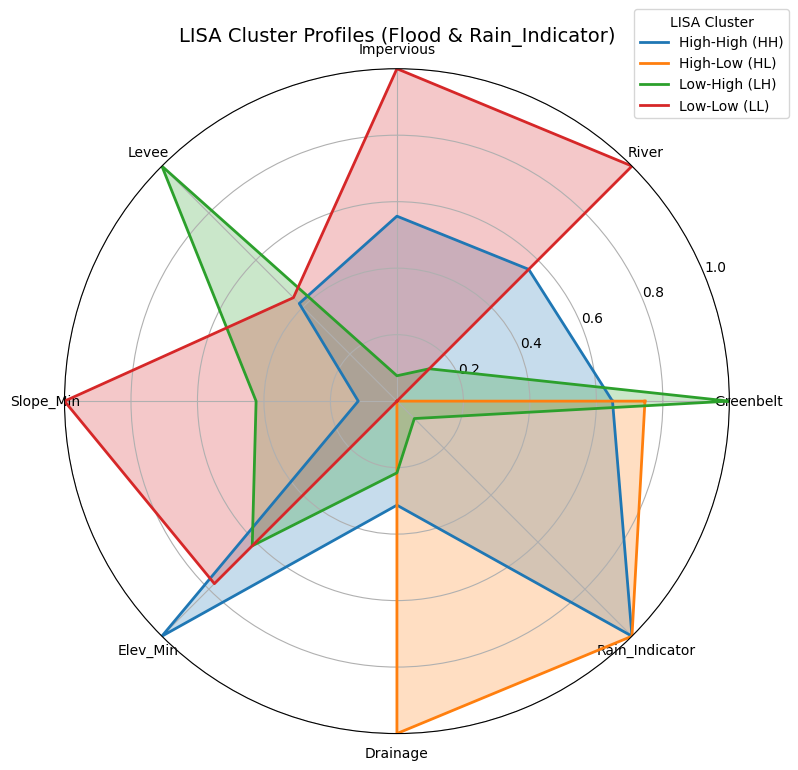

In [ ]:
# 레이더 차트용 데이터 준비
# 클러스터 그룹별 평균값 계산
radar_data = gdf.groupby('cluster_name')[['Greenbelt', 'River',
       'Impervious', 'Levee', 'Slope_Min', 'Elev_Min',
       'Drainage','Rain_Indicator']].mean().reset_index()
radar_data.set_index('cluster_name', inplace=True)

# 0~1로 Min-Max 정규화(레이더 가독성용)
radar_normalized = (radar_data - radar_data.min()) / (radar_data.max() - radar_data.min())

# 레이더 차트 시각화
labels = radar_normalized.columns
N = len(labels)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False)
angles = np.concatenate([angles, angles[:1]])  # 그래프를 닫기 위해 첫 번째 값 추가

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

for i, row in radar_normalized.iterrows():
    vals = row.values
    vals = np.concatenate([vals, vals[:1]])
    ax.plot(angles, vals, label=i, linewidth=2)
    ax.fill(angles, vals, alpha=0.25)

ax.set_thetagrids(angles[:-1] * 180/np.pi, labels)
ax.set_rlim(0, 1)
ax.legend(title='LISA Cluster', loc='upper right', bbox_to_anchor=(1.1, 1.1))
ax.set_title('LISA Cluster Profiles (Flood & Rain_Indicator)', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

/tmp/ipython-input-37881526.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_name', y=var, data=gdf, ax=axes[i], palette='viridis')
/tmp/ipython-input-37881526.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_name', y=var, data=gdf, ax=axes[i], palette='viridis')
/tmp/ipython-input-37881526.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_name', y=var, data=gdf, ax=axes[i], palette='viridis')
/tmp/ipython-input-37881526.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecate

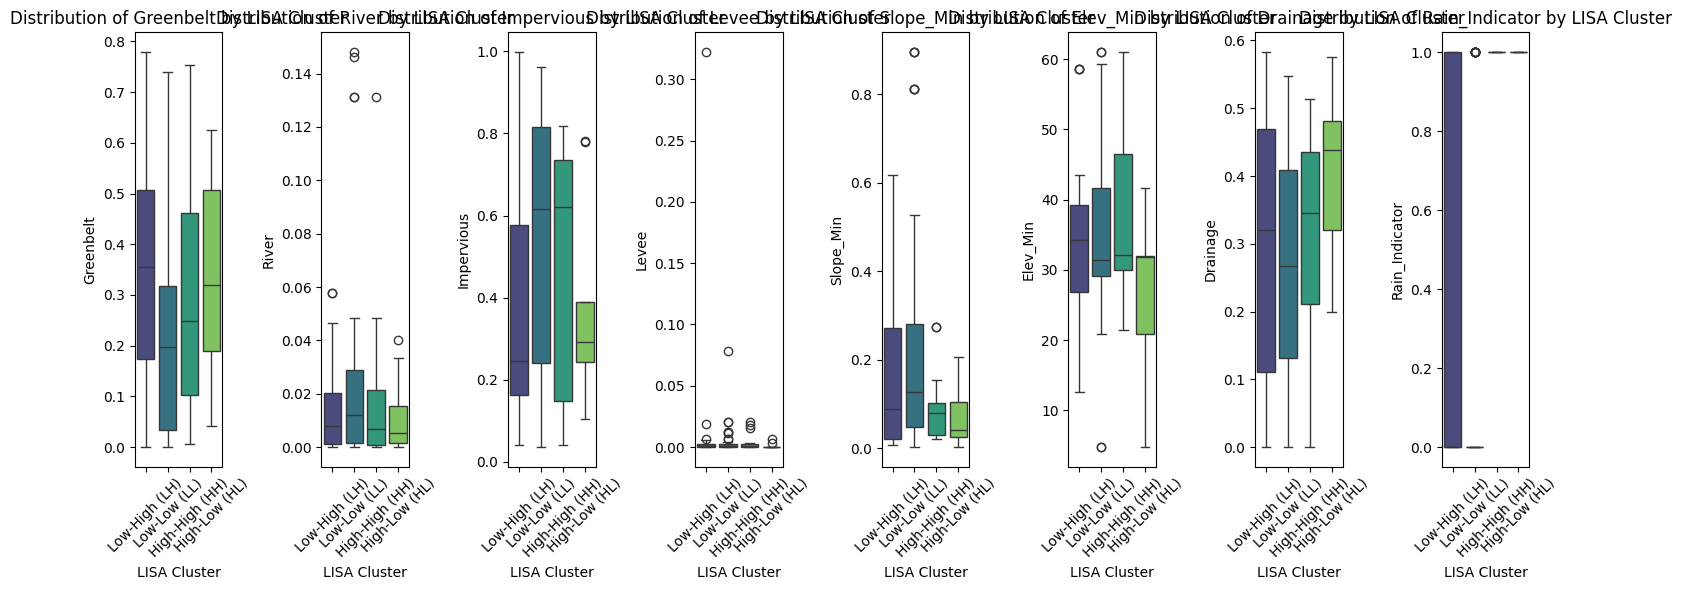

In [ ]:
import seaborn as sns

# Box Plot을 그릴 변수 목록을 정의합니다.
variables_to_plot = ['Greenbelt', 'River',
       'Impervious', 'Levee', 'Slope_Min', 'Elev_Min',
       'Drainage','Rain_Indicator']

# 클러스터 번호에 따라 그룹명을 지정합니다.
cluster_labels = {1: 'High-High (HH)', 2: 'Low-Low (LL)', 3: 'Low-High (LH)', 4: 'High-Low (HL)'}
gdf['cluster_name'] = gdf['lisa_cluster'].map(cluster_labels)

# Box Plot 그리기
fig, axes = plt.subplots(1, len(variables_to_plot), figsize=(15, 6))

for i, var in enumerate(variables_to_plot):
    sns.boxplot(x='cluster_name', y=var, data=gdf, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {var} by LISA Cluster')
    axes[i].set_xlabel('LISA Cluster')
    axes[i].set_ylabel(var)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()